# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [6]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def sigmasoid(x):
    y = 1 + np.exp(-x)
    y = 1 / y
    return y

def get_error_rate(pred, actual) :
    a = [pred == 1]
    b = [actual[a] == -1]
    error = np.sum(b) 
    a = [pred == -1]
    b = [actual[a] == 1]
    error += np.sum(b)
    error = error / pred.shape[0]
    return error


def sum_part_fn(alpha,K):
    alphaT = alpha.T
    alphaTK = np.dot(alphaT,K)
    f = lambda x: sigmasoid(x)
    sig = f(alphaTK)
    return np.dot(K,sig.T)

def g(x):
    if x == 0:
        return 100000
    else:
        return -np.log2(x)

def sum2fn(alpha,K):
    K = -K
    alphaT = alpha.T
    alphaTK = np.dot(alphaT,K)
    f = lambda x: sigmasoid(x)
    sig = f(alphaTK)
    sig = np.array([g(xi) for xi in sig[0]])
    return np.sum(sig)


def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
    
    #"""
    #Arguments:
    #X : (n,d) shape numpy array
    #Y : (n,)  shape numpy array
    #X_test : (m,d) shape numpy array
    #kernel = 'linear' or 'rbf' or 'poly' 
    #reg_param = $\lambda$
    #num_iter_gd = number of GD iterations.

    #Returns the result of kernel logistic regression :
    #alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    #Primal problem:
    #$ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    #the dual of which is

    #$ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    #where $\phi$ is the feature got by the kernel.

    #Where K is the nxn kernel matrix computed on the training data.

    #The kernel is defined by the kernel_param:
    #If kernel=linear: K(\u,\v) = \u^\top \v  
    #If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    #If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)

    #"""
    Y = np.array(Y).reshape(-1,1)
    L = []
    L1 = []
    Eta_list = []
    lin_etas = [1e-15,1e-14,1e-13,1e-10,1e-9,1e-6,1e-5,1e-2,1e-1]
    rbf_etas = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1]
    poly_etas = [lin_etas]
    poly_etas.append([1e-28,1e-27,1e-19,1e-18,1e-6,1e-5])
    poly_etas.append([1e-56,1e-55,1e-33,1e-32,1e-9,1e-8,1e-6,1e-5])
    poly_etas.append([1e-84,1e-46,1e-45,1e-9,1e-8])
    poly_etas.append([1e-112,1e-60,1e-11,1e-9,1e-8])
    for i in range(0, X.shape[0]) :
        for j in range(0, X.shape[0]) :
            if kernel == 'linear' :
                uT = np.array(X[i].reshape(1,-1))
                v = np.array(X[j].reshape(-1,1))
                uTv = np.dot(uT, v)
                L.append(uTv[0][0])
                L1.append(-Y[i][0]*uTv[0][0])
                Eta_list = lin_etas

            elif kernel == 'poly' :
                uT = np.array(X[i].reshape(1,-1))
                v = np.array(X[j].reshape(-1,1))
                uTv = np.dot(uT, v)
                x = uTv[0][0] + 1
                x = (x ** kernel_param)
                L.append(x)
                L1.append(-Y[i][0]*x)
                y = int(kernel_param/2)
                Eta_list = poly_etas[y]

            elif kernel == 'rbf' :
                #print(str(i)+" "+str(j))
                u = np.array(X[i].reshape(1,-1))
                v = np.array(X[j].reshape(1,-1))
                x = np.subtract(u,v)
                x = np.dot(x, x.T)
                x = kernel_param * (x[0][0])
                x = np.exp(-x)
                L.append(x)
                L1.append(-Y[i][0]*x)
                Eta_list = rbf_etas
    
    K = (np.array(L)).reshape(X.shape[0], -1)
    K1 = (np.array(L1)).reshape(X.shape[0], -1)
    K1T = K1.T
    best_eta = 0
    best_alpha = np.zeros( [X.shape[0],1] , dtype = int)
    alpha = np.zeros( [X.shape[0],1] , dtype = int)
    min_r = sum2fn(alpha,K1T)
    for eta in Eta_list :
        alpha = np.zeros( [X.shape[0],1] , dtype = int)
        curr_min = 500000
        for i in range(0, num_iter_gd) :
            sum_part = np.zeros( [X.shape[0],1] , dtype = int) 
            sum_part = sum_part_fn(alpha,K1T)
            lambda_part = reg_param * np.dot(K, alpha)  
            gd = sum_part + lambda_part 
            #print(gd)
            alpha = np.subtract(alpha, eta * gd)
            sum_part2 = sum2fn(alpha,K1T)
            lambda_part2 = 0.5*reg_param * np.dot(alpha.T,np.dot(K, alpha)) 
            r_alpha = (sum_part2+lambda_part2)
            if(r_alpha<min_r):
                best_alpha = alpha
                best_eta = eta
                min_r = r_alpha
            if(r_alpha<curr_min):
                curr_min = r_alpha
        #print(str(eta)+" "+str(curr_min))
    #print(best_eta)
    return best_alpha

def Kx1x2(u,v,k,lam):
    uTv = np.dot(u.T, v)
    if k == 'linear':
        return uTv
    if k == 'poly':
        return (uTv+1)**lam
    if k == 'rbf':
        x = -lam*((np.linalg.norm(u-v))**2)
        return np.exp(x)
        
def compute_k(X_train,X_test,kernel, kernel_param):
    L1 = []
    #print(X_train.shape[0])
    #print(X_test.shape[0])
    for i in range(X_train.shape[0]):
        L2 = []
        for j in range(X_test.shape[0]):
            #print(str(i)+" "+str(j))
            L2.append( Kx1x2(X_train[i],X_test[j],kernel,kernel_param))
        L1.append(np.array(L2))
    #print("MOUNIK")
    L1 = np.array(L1)
    #print("VVSS")
    return L1
        

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    #print(train_Y)
    #print('started')
    k = compute_k(train_X,test_X,kernel, kernel_param)
    temp = np.dot(alpha.T, k)
    #print('done')  
    Y = temp[0]
    #print(Y)
    for i in range(Y.shape[0]):
        if(Y[i]>=0):
            Y[i] = 1
        else:
            Y[i] = -1
    #print(Y)
    return Y

In [7]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.
def get_best_hyperparameters(X_train, Y_train, kernel) :
    L_reg = []
    L_kernel = []
    n = X_train.shape[0]
    a = int(0.8*n)
    #here test = validation
    X_test = X_train[range(a,n)]
    Y_test = Y_train[range(a,n)]
    X_train = X_train[range(a)]
    Y_train = Y_train[range(a)]
    for i in [0.0001,0.001,0.01,0.1,1,10] :
        L_kernel.append(i)      
    for i in range(-6, 3) :
        L_reg.append((10**i))
    min_error = 1 
    if kernel == 'linear' :
        for reg_param in L_reg :
            #print("reg param ", reg_param)
            temp_alpha = train_pred_logistic_regression(X_train, Y_train, 'linear', reg_param , 1 , 100)
            #print("temp alpha : ", temp_alpha)
            Y_test_pred = test_pred(temp_alpha, X_train, Y_train, X_test, kernel, 1)
            error = get_error_rate(Y_test, Y_test_pred)
            #print(error)
            if(min_error > error) :
                min_error = error
                best_alpha = temp_alpha
                best_reg_param = reg_param
                best_kernel_param = 1
       
    elif kernel == 'poly' :
        for kernel_param in [1,2,4,6,8] :
            for reg_param in L_reg :
                #print("kernel param ", kernel_param)
                #print("reg param ", reg_param)
                temp_alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param , kernel_param , 100)
                #print("temp alpha : ", temp_alpha)
                Y_test_pred = test_pred(temp_alpha, X_train, Y_train, X_test, kernel, kernel_param)
                error = get_error_rate(Y_test, Y_test_pred)
                #print("error_rate : ", error)
                if(min_error > error) :
                    min_error = error
                    best_alpha = temp_alpha
                    best_reg_param = reg_param
                    best_kernel_param = kernel_param
                
    elif kernel == 'rbf' :
        for kernel_param in L_kernel :
            for reg_param in L_reg :
                #print("kernel param ", kernel_param)
                #print("reg param ", reg_param)
                temp_alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param , kernel_param , 100)
                #print("temp alpha : ", temp_alpha)
                Y_test_pred = test_pred(temp_alpha, X_train, Y_train, np.array(X_test).reshape(-1, X_train.shape[1]), kernel, kernel_param)
                error = get_error_rate(Y_test, Y_test_pred)
                #print("error_rate : ", error)
                if(min_error > error) :
                    min_error = error
                    best_alpha = temp_alpha
                    best_reg_param = reg_param
                    best_kernel_param = kernel_param
                    
    Y_pred_tr = test_pred(best_alpha, X_train, Y_train,X_train, kernel, best_kernel_param)
    error = get_error_rate(Y_train, Y_pred_tr)
    l = [X_train,Y_train]
    return[best_kernel_param, best_reg_param, best_alpha, min_error,error,l]  

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l
    """
dataset = [ 'dataset_A.npz', 'dataset_B.npz', 'dataset_C.npz','dataset_D.npz']
np.warnings.filterwarnings('ignore')
kernel_types = ['linear','poly','rbf']
kernel_paramx = []
reg_paramx = []
alpha_paramx = []
test_paramx = []
train_paramx = []
for i in range(0, 3) :
    for j in range(0,4) :
        l = get_data(dataset[j])
        X_train = l[0]
        Y_train = l[1]
        X_test = l[2]
        Y_test = l[3]
        print("For ", kernel_types[i])
        params = get_best_hyperparameters(X_train, Y_train, kernel_types[i])
        s = dataset[j]+" "
        s = s+ str(params[0])+" "
        s = s+ str(params[1])+" "
        s = s+ str(params[4])+" "
        test = test_pred(params[2], params[5][0], params[5][1],X_test,kernel_types[i], params[0])
        test_error = get_error_rate(Y_test, test)
        s = s+ str(test_error)+" "
        print(s)"""



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
                    
                                        BEST HYPER-PARAMETERS FOR LINEAR KERNEL
                                Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2}

| Data Set  | Best regularization parameter | Train 0-1 error | Test 0-1 error |
|-----------|------------------------------:|----------------:|----------------|
| dataset_A |                          1e-6 |          0.1325 |           0.15 |
| dataset_B |                          1e-6 |    0.1766666667 |          0.198 |
| dataset_C |                          1e-6 |          0.2425 |   0.2188552189 |
| dataset_D |                          100  |        0.096875 |   0.1360946746 |


 
                                        BEST HYPER-PARAMETERS FOR POLY KERNEL
                                         Kernel parameter from {1,2,4,6,8}
                             Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2}
                                         
| Data Set  | Best kernel parameter | Best regularization parameter | Train 0-1 error | Test 0-1 error |
|-----------|----------------------:|------------------------------:|----------------:|----------------|
| dataset_A |                     1 |                           0.1 |    0.1358333333 |          0.158 |
| dataset_B |                     1 |                          1e-6 |    0.1691666667 |          0.196 |
| dataset_C |                     8 |                          1e-6 |            0.02 |  0.05723905724 |
| dataset_D |                     1 |                           100 |             0.1 |   0.1360946746 |



                                         BEST HYPER-PARAMETERS FOR RBF KERNEL
                                     Kernel parameter from {0.0001,0.001,0.01,0.1,1,10}
                              Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2}

| Data Set  | Best kernel parameter | Best regularization parameter | Train 0-1 error | Test 0-1 error |
|-----------|----------------------:|------------------------------:|----------------:|----------------|
| dataset_A |                     1 |                          1e-6 | 0.0008333333333 |          0.006 |
| dataset_B |                  0.01 |                          0.01 |           0.185 |          0.214 |
| dataset_C |                   0.1 |                          1e-6 |               0 |  0.03367003367 |
| dataset_D |                 0.001 |                          1e-6 |               0 |   0.1124260355 |


Observations :

Train data errors :

Dataset A error : rbf kernel < linear kernel < poly kernel : A non_linear curve seperates data better than a straight line

Dataset B error : poly kernel < linear kernel < rbf kernel : (poly with k = 1)straight line seperates better than non-linear curves

Dataset C error : linear kernel > poly kernel > rbf kernel : A non_linear curve seperates data better than a straight line

Dataset D error : poly kernel > linear kernel > rbf kernel : A non_linear curve seperates data better than a straight line

1. Hyper-parameters like reg_param and kernel_param control how wiggling the boundary can be.
2. Higher the reg_param, the less wiggling the decision boundary will be.
3. Higher the kernel_param, the more wiggling the boundary will be.(data points will have more influence on boundary)
4. Dataset_B has more error than Dataset_A. Hence Dataset_A is more seperable than Dataset_B (can be seen in graphs below)
5. Consider rbf kernel train 0-1 errors : C  = D < A < B. Dataset C and D reached 100% train data seperability. Dataset A is almost seperable. Dataset B has worst seperability within given range of parameters. It is also evident from graph as positive and negative points are mixed up making seperation difficult.(Note that train data above refers to 4/5th part of X_train not whole of X_train)


Assumptions : 

1.Validation set is last 1/5th portion of train data. 

2.Train 0-1 error doesn't include error of validation data. 

3.Graph doesn't include validation data.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


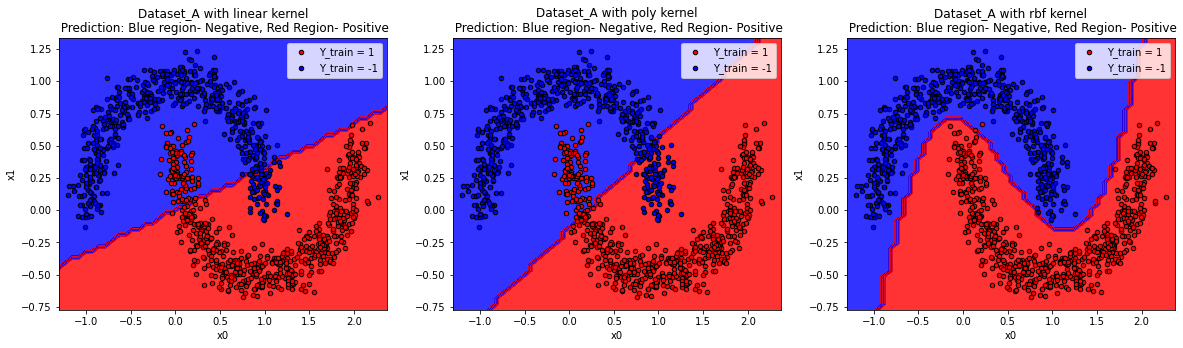

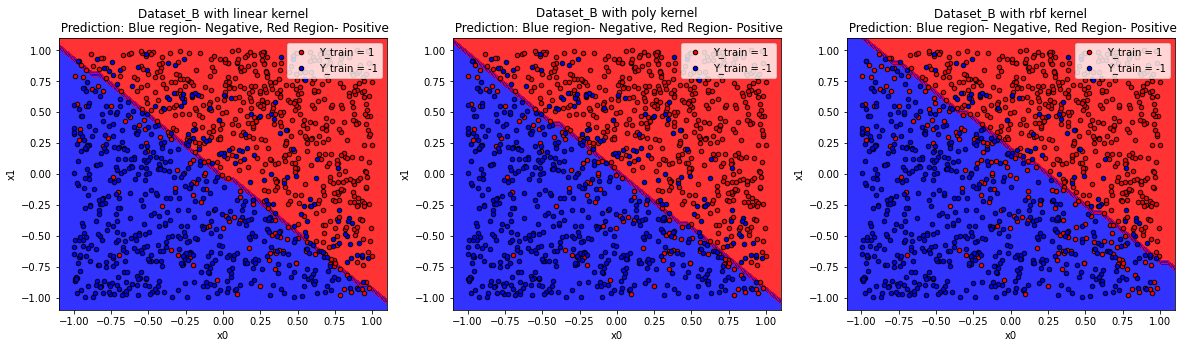

In [8]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
def make_meshgrid(x, y):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,50), np.linspace(y_min,y_max,50))
    return xx, yy



def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

kernel_paramx =  [[1, 1, 1], [1, 1, 0.01], [1, 8, 0.1], [1, 1, 1e-03]]
reg_paramx =  [[1e-06, 0.1, 1e-06], [1e-06, 1e-06, 0.01], [1e-06, 1e-06, 1e-06], [100, 100, 1e-6]]

dataset = ['dataset_A.npz', 'dataset_B.npz']
for k in range(0,2) : 
    l = get_data(dataset[k])
    X_train = l[0]
    Y_train = l[1]
    n = X_train.shape[0]
    a = int(0.2*n)
    X_train = X_train[range(a,n)]
    Y_train = Y_train[range(a,n)]
    Y_train = Y_train.reshape(-1, 1)
    X11 = []
    X22 = []
    for i in range(X_train.shape[0]):
        if Y_train[i][0] == 1:
            X11.append(X_train[i])
        else:
            X22.append(X_train[i])
    X11 = np.array(X11)
    X22 = np.array(X22)
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    kernel_types = ['linear','poly','rbf']
    kernel_param = kernel_paramx[k]
    reg_param = reg_paramx[k]
    fig = plt.figure(figsize = (20,5))
    Y_pred = []
    for i in range(0,3): 
        plt1 = fig.add_subplot(1,3, i+1)
        alpha = train_pred_logistic_regression(X_train, Y_train, kernel_types[i], reg_param[i] , kernel_param[i], num_iter_gd=100)
        Y_pred.append(test_pred(alpha, X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], kernel_types[i], kernel_param[i]))
        out = plt1.contourf(xx, yy, Y_pred[i].reshape(xx.shape),colors=('b', 'r'), alpha = 0.8)
        plt.scatter(X11[:, 0], X11[:, 1],s = 20,label = "Y_train = 1",cmap = plt.cm.coolwarm,c = 'r',edgecolors='k')
        plt.scatter(X22[:,0], X22[:, 1],s = 20,label = "Y_train = -1",cmap = plt.cm.coolwarm,c = 'b',edgecolors='k')
        plt1.set_xlabel('x0')
        plt1.set_ylabel('x1')
        plt1.legend(loc='upper right')
        s = 'Dataset_'  + chr(ord('A') + k) + ' with ' + kernel_types[i] + ' kernel'+ '\n Prediction: Blue region- Negative, Red Region- Positive'
        plt1.set_title(s)
        
    plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [10]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here
def get_SVM_pred(X_train, Y_train, kernel, reg_param, kernel_param) :
    if kernel == 'linear' :
        clf = svm.SVC(kernel = 'linear', C = reg_param)
    elif kernel == 'poly' :
        clf = svm.SVC(kernel ='poly', degree = kernel_param, C = reg_param)
    elif kernel == 'rbf' :
        clf = svm.SVC(kernel = 'rbf', gamma = kernel_param, C = reg_param)
    clf = clf.fit(X_train, Y_train)
    return clf

In [11]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
def get_error_rate(pred, actual) :
    a = [pred == 1]
    b = [actual[a] == -1]
    error = np.sum(b)
    
    a = [pred == -1]
    b = [actual[a] == 1]
    error += np.sum(b)
    error = error / pred.shape[0]
    return error

def get_best_hyperparameters_SVM(X_train, Y_train, kernel) :
    # 20 - 80 shift
    X_test = X_train[list(range(0,int(X_train.shape[0]/5) +1))]
    Y_test = Y_train[list(range(0,int(Y_train.shape[0]/5) +1))]
    X_train = X_train[list(range(int(X_train.shape[0]/5) +1, X_train.shape[0]))]
    Y_train = Y_train[list(range(int(Y_train.shape[0]/5) +1, Y_train.shape[0]))] 
    min_error = 1
    train_error = 0
    L_reg = []
    for i in range(-6, -2) :
        L_reg.append(pow(10, i))
    L_kernel = []
    for i in range(-4, 5) :
        L_kernel.append(pow(10,i)) 
    if kernel == 'linear' :
        for reg_param in L_reg :
            #print("reg param ", reg_param)
            clf = get_SVM_pred(X_train, Y_train, kernel, reg_param, 1)
            Y_pred = clf.predict(X_test)
            error = get_error_rate(Y_pred, Y_test)
            train_error = get_error_rate((clf.predict(X_train)), Y_train)
            #print("error ", error)
            if min_error > error :
                min_error = error
                best_reg_param = reg_param
                best_kernel_param = 1
                train_error_param = train_error
                
            
    elif kernel == 'poly' :
        for kernel_param in [1e-4,1e-3,1e-2,1e-1,1,2,4,6,8,10] :
              for reg_param in L_reg :
                    #print("kernel param ", kernel_param)
                    #print("reg param ", reg_param)
                    clf = get_SVM_pred(X_train, Y_train, kernel, reg_param, kernel_param)
                    Y_pred = clf.predict(X_test)
                    error = get_error_rate(Y_pred, Y_test)
                    train_error = get_error_rate((clf.predict(X_train)), Y_train)
                    #print("error ", error)
                    if min_error > error :
                        min_error = error
                        best_reg_param = reg_param
                        best_kernel_param = kernel_param
                        train_error_param = train_error
                        
    elif kernel == 'rbf' :
        for kernel_param in L_kernel :
              for reg_param in L_reg :
                    #print("kernel param ", kernel_param)
                    #print("reg param ", reg_param)
                    Y_pred = get_SVM_pred(X_train, Y_train, kernel, reg_param, kernel_param)
                    clf = get_SVM_pred(X_train, Y_train, kernel, reg_param, kernel_param)
                    Y_pred = clf.predict(X_test)
                    error = get_error_rate(Y_pred, Y_test)
                    train_error = get_error_rate((clf.predict(X_train)), Y_train)
                    #print("error ", error)
                    if min_error > error :
                        min_error = error
                        best_reg_param = reg_param
                        best_kernel_param = kernel_param
                        train_error_param = train_error
                    
    return[best_kernel_param, best_reg_param]  

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l
    '''
dataset = ['dataset_A.npz', 'dataset_B.npz', 'dataset_C.npz', 'dataset_D.npz']
kernel_types = ['linear','poly', 'rbf']
kernel_paramx = []
reg_paramx = []
for i in range(0,4) :
    l = get_data(dataset[i])
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    temp_kernel = []
    temp_reg = []
    for i in range(0,3) :
      print("For ", kernel_types[i])
      params = get_best_hyperparameters_SVM(X_train, Y_train, kernel_types[i])
      print("best kernel param ", params[0])
      temp_kernel.append(params[0])
      print("best reg param ", params[1]) 
      temp_reg.append(params[1])
      clf = get_SVM_pred(X_train, Y_train, kernel_types[i], params[1], params[0])
      print("Train 0-1 error  : ", get_error_rate((clf.predict(X_train)), Y_train))
      print("Test 0-1 error  : ", get_error_rate((clf.predict(X_test)), Y_test))
    kernel_paramx.append(temp_kernel)
    reg_paramx.append(temp_reg)

print(kernel_paramx)
print(reg_paramx)
'''

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

                                   BEST HYPER-PARAMETERS FOR LINEAR KERNEL
                        Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2,1e3}

| Dataset       | Best regularization parameter |      Train 0-1 error |       Test 0-1 error |
|---------------|------------------------------:|---------------------:|---------------------:|
| Dataset_A     |                           1e1 |  0.12933333333333333 |                0.134 |
| Dataset_B     |                          1e-2 |                 0.17 |                0.188 |
| Dataset_C     |                          1e-3 |  0.07266666666666667 |  0.09764309764309764 |
| Dataset_D     |                           1e0 |               0.0275 |  0.05325443786982249 |

                                        BEST HYPER-PARAMETERS FOR POLY KERNEL
                                Kernel parameter from {1e-4,1e-3,1e-2,1e-1,1,2,4,6,8,10}
                            Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2,1e3}


| Dataset       | Best kernel parameter | Best regularization parameter |      Train 0-1 error |        Test 0-1 error |
|---------------|----------------------:|------------------------------:|---------------------:|----------------------:|
| Dataset_A     |                   1   |                           1e1 |  0.12933333333333333 |                 0.134 |
| Dataset_B     |                   1   |                          1e-2 |                0.172 |                  0.18 |
| Dataset_C     |                   4   |                          1e-6 |                  0.0 |  0.020202020202020204 |
| Dataset_D     |                   1   |                           1e1 |                0.035 |   0.05917159763313609  |
                           
                                       BEST HYPER-PARAMETERS FOR RBF KERNEL
                              Kernel parameter from {1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4}
                            Reguralization parameter from {1e-6,1e-5,1e-4.....1e0,1e1,1e2,1e3}



| Dataset       | Best kernel parameter | Best regularization parameter |     Train 0-1 error |        Test 0-1 error |
|---------------|----------------------:|------------------------------:|--------------------:|----------------------:|
| Dataset_A     |                  1e-1 |                           1e2 |               0.002 |                 0.004 |
| Dataset_B     |                  1e-4 |                           1e1 |  0.1846666666666666 |                   0.2 |
| Dataset_C     |                  1e-3 |                           1e1 |                 0.0 |  0.016835016835016835 |
| Dataset_D     |                  1e-4 |                           1e2 |               0.005 |   0.07692307692307693 |`


Observations :

Train data errors :

Dataset A error : linear kernel = poly kernel > rbf kernel : A non_linear curve seperates data better than a straight line

Dataset B error : linear kernel ~ poly kernel < rbf kernel : straight line seperates better than non-linear curves

Dataset C error : linear kernel > poly kernel = rbf kernel : A non_linear curve seperates data better than a straight line

Dataset D error : linear kernel < poly kernel > rbf kernel : A non_linear curve seperates data better than a straight line

1. Hyper-parameters like reg_param and kernel_param determine how wiggling the SVM boundary can be.
2. Higher the reg_param, the less wiggling the SVM decision boundary will be.(because of more penalty for misclassification)
3. Higher the kernel_param, the more wiggling the SVM boundary will be.(data points will have more influence on boundary)
4. Dataset_B has more error than Dataset_A. Hence Dataset_A is more seperable than Dataset_B (can be seen in graphs below)
5. Consider rbf kernel train 0-1 errors : C < A < D < B. Dataset C reached 100% train data seperability. Dataset A and D train data are almost seperable. Dataset B has worst seperability within given range of parameters. It is also evident from graph as positive and negative points are mixed up making seperation difficult.


Assumptions : 

1.Validation set is last 1/5th portion of train data. 

2.Train 0-1 error includes error of validation data. 

3.Graph doesn't include validation data.  


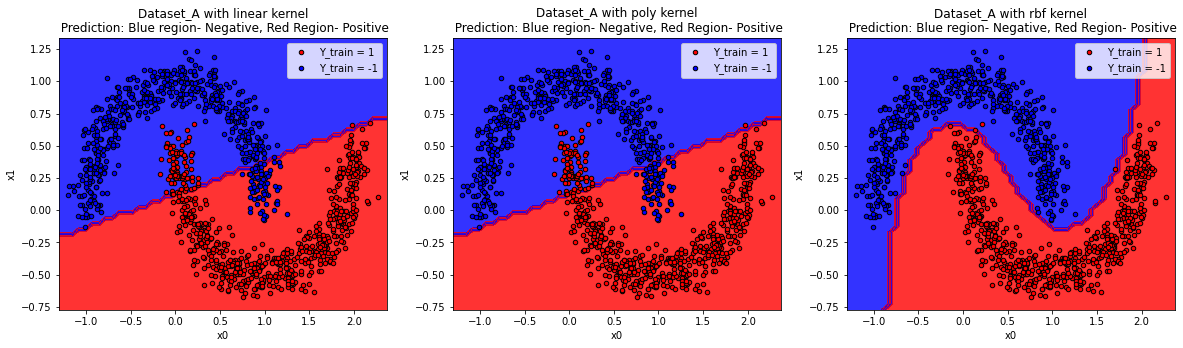

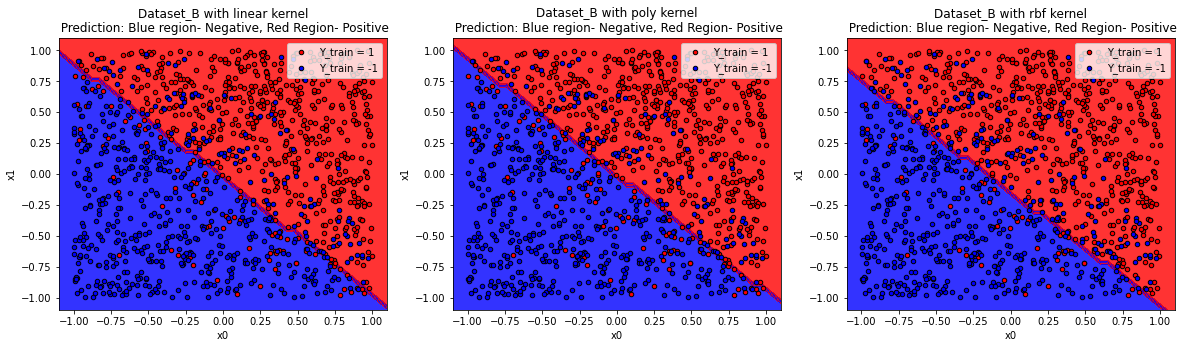

In [12]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,50), np.linspace(y_min,y_max,50))
    return xx, yy

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

dataset = ['dataset_A.npz', 'dataset_B.npz', 'dataset_C.npz', 'dataset_D.npz']
kernel_paramx = [[1, 1, 0.1], [1, 1, 0.0001], [1, 4, 0.001], [1, 1, 0.0001]]
reg_paramx = [[10, 10, 100], [0.01, 0.01, 10], [0.001, 1e-06, 10], [1, 10, 100]]
np.warnings.filterwarnings('ignore')
for k in range(0,2) : 
    l = get_data(dataset[k])
    X_train = l[0]
    Y_train = l[1]
    n = X_train.shape[0]
    a = int(0.2*n)
    X_train = X_train[range(a,n)]
    Y_train = Y_train[range(a,n)]
    Y_train = Y_train.reshape(-1, 1)
    X11 = []
    X22 = []
    for i in range(X_train.shape[0]):
        if Y_train[i][0] == 1:
            X11.append(X_train[i])
        else:
            X22.append(X_train[i])
    X11 = np.array(X11)
    X22 = np.array(X22)
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    kernel_types = ['linear','poly', 'rbf']
    kernel_param = kernel_paramx[k]
    reg_param = reg_paramx[k]
    fig = plt.figure(figsize = (20,5))
    Y_pred = []
    for i in range(0,3): 
        plt1 = fig.add_subplot(1,3, i+1)
        clf = get_SVM_pred(X_train, Y_train, kernel_types[i], reg_param[i], kernel_param[i])
        Y_pred.append(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
        y = Y_pred[i].reshape(xx.shape)
        out = plt1.contourf(xx, yy, Y_pred[i].reshape(xx.shape),colors=('b', 'r'), alpha = 0.8)
        plt.scatter(X11[:, 0], X11[:, 1],s = 20,label = "Y_train = 1",cmap = plt.cm.coolwarm,c = 'r',edgecolors='k')
        plt.scatter(X22[:,0], X22[:, 1],s = 20,label = "Y_train = -1",cmap = plt.cm.coolwarm,c = 'b',edgecolors='k')
        plt1.set_xlabel('x0')
        plt1.set_ylabel('x1')
        plt1.legend(loc='upper right')
        s = 'Dataset_'  + chr(ord('A') + k) + ' with ' + kernel_types[i] + ' kernel'+ '\n Prediction: Blue region- Negative, Red Region- Positive'
        plt1.set_title(s)
        
    plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [13]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def h(a):
    if(a == 1 or a==0):
        return 0
    b = 1-a
    return (a*np.log2(1/a)+b*np.log2(1/b))
def entropy(pl,ql,pr,qr):
    return -(pl*h(ql)+pr*h(qr))

def value_of_criterion(criterion,total_left_points,total_right_points,pos_left_points,pos_right_points,left_val):
    if criterion == 'accuracy':
        if left_val == -1:
            return ((total_left_points)-(pos_left_points)+(pos_right_points))/(total_left_points+total_right_points)
        else:
            return ((total_right_points)+(pos_left_points)-(pos_right_points))/(total_left_points+total_right_points)
    else:
        total_points = total_left_points+total_right_points
        if(total_left_points == 0):
            return entropy(total_left_points/total_points,1,total_right_points/total_points,pos_right_points/total_right_points)
        if(total_right_points == 0):
            return entropy(total_left_points/total_points,pos_left_points/total_left_points,total_right_points/total_points,1)
        return entropy(total_left_points/total_points,pos_left_points/total_left_points,
                       total_right_points/total_points,pos_right_points/total_right_points)   

def max_min(X_train,d):
    maxi = -500
    mini = 500
    for i in range(X_train.shape[0]):
        if(maxi<X_train[i][d]):
            maxi = X_train[i][d]
        if(mini>X_train[i][d]):
            mini = X_train[i][d]
    return (maxi,mini)

def args_to_criterion(X_train,Y_train,d,value):
    total_left_points = 0
    total_right_points = 0
    pos_left_points = 0
    pos_right_points = 0
    for i in range(X_train.shape[0]):
        if(X_train[i][d]<value):
            total_left_points+=1
            if(Y_train[i] == 1):
                pos_left_points+=1
        else:
            total_right_points+=1
            if(Y_train[i] == 1):
                pos_right_points+=1
    return (total_left_points,total_right_points,pos_left_points,pos_right_points)


def get_tree(X, Y,node_val,node_pos,num_nodes_stop,criterion):
    n = X.shape[0]
    d = X.shape[1]
    a = []
    #print(n)
    if(sum(Y)==n):
        t = [node_pos,0,-1,-1,1]
        a.append(np.array(t))
        return np.array(a)
    elif(sum(Y)==-n):
        t = [node_pos,0,-1,-1,-1]
        a.append(np.array(t))
        return np.array(a)
    elif(n<=num_nodes_stop):
        t = [node_pos,0,-1,-1,node_val]
        a.append(np.array(t))
        return np.array(a)
    else:
        to_comp_val_of_cr = -500
        req_d1 = 0
        req_split_val = 0
        req_left_val = 0
        req_k = 0
        l = []
        for d1 in range(d):
            maxi,mini = max_min(X,d1)
            diff = maxi-mini
            for k in range(37):
                val = mini+k*diff/35
                a,b,c,d3 = args_to_criterion(X,Y,d1,val)
                x1 = value_of_criterion(criterion,a,b,c,d3,-1)
                x2 = value_of_criterion(criterion,a,b,c,d3,1)
                y1 = value_of_criterion('accuracy',a,b,c,d3,-1)
                y2 = value_of_criterion('accuracy',a,b,c,d3,1)
                if(x1<x2):
                    to_comp = x2
                    #print(x2)
                    if(to_comp_val_of_cr<to_comp):
                        to_comp_val_of_cr=to_comp
                        req_left_val = 1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
                        l = [a,b,c,d3]
                elif(x1>x2):
                    to_comp = x1
                    #print(x1)
                    if(to_comp_val_of_cr<=to_comp):
                        to_comp_val_of_cr=to_comp
                        req_left_val = -1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
                        l = [a,b,c,d3]
                else:
                    to_comp = x1
                    #print(x1)
                    if(to_comp_val_of_cr<=to_comp):
                        to_comp_val_of_cr=to_comp
                        if(y1>=y2):
                            req_left_val = -1
                        else:
                            req_left_val = 1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
                        l = [a,b,c,d3]
        #print(str(a)+" "+str(b)+" "+str(c)+" "+str(d3)+" ")
        #print(l)
        #print(str(to_comp_val_of_cr)+" +nodepos:"+str(node_pos)+"val = "+str(req_split_val)+" k="+str(req_k)+"d1 = "+str(req_d1))
        if(req_k == 0 or req_k == 36):
            a = []
            t = [node_pos,0,-1,-1,node_val]
            a.append(np.array(t))
            return np.array(a)
        X1= []
        Y1 = []
        X2=[]
        Y2 = []
        for i in range(n):
            if(X[i][req_d1]<req_split_val):
                X1.append(X[i])
                Y1.append(Y[i])
            else:
                X2.append(X[i])
                Y2.append(Y[i])
        X1 = np.array(X1)
        X2 = np.array(X2)
        Y1 = np.array(Y1)
        Y2 = np.array(Y2)
        a = 2*node_pos
        child1 = get_tree(X1, Y1,req_left_val,a,num_nodes_stop, criterion)
        child2 = get_tree(X2, Y2,0-req_left_val,a+1,num_nodes_stop, criterion)
        a = []
        t = [node_pos,1,req_d1,req_split_val,node_val]
        a.append(np.array(t))
        a.extend(child1)
        a.extend(child2)
        return np.array(a)    

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    n = X.shape[0]
    d = X.shape[1]
    a = []
    n1 = 0
    n0 = 0
    for i in range(n):
        if(Y[i] == -1):
            n0+=1
        else:
            n1+=1
    if(n1<=n0):
        return get_tree(X, Y,-1,1,num_nodes_stop, criterion)
    else:
        return get_tree(X, Y,1,1,num_nodes_stop, criterion)
        
""" Returns a decision tree trained on X and Y. 
Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
Split criterion can be either 'accuracy' or 'entropy'.
Returns a tree (In whatever format that you find appropriate)
"""
    

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances.
    """
    a = tree
    a = a[a[:,0].argsort(kind='mergesort')]
    this_dict = {a[i][0]: a[i] for i in range(a.shape[0])}
    Y = []
    for elt in test_X:
        t = 1
        while this_dict[t][1] > 0:
            l = this_dict[t]
            if(elt[int(l[2])]<l[3]):
                pos = l[0]
                t = int(2*pos)
            else:
                pos = l[0]
                t = int(2*pos+1)
        Y.append(this_dict[t][4])
    return np.array(Y)


def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

In [14]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

def get_best_param(data_set,criterion):
    l = get_data(data_set)
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    n = X_train.shape[0]
    a = int(0.2*n)
    validation_set = X_train[range(a)]
    validation_Y = Y_train[range(a)]
    train_set = X_train[range(a,n)]
    train_Y = Y_train[range(a,n)]
    num_nodes_stop = 1
    best_param = 1
    best_accuracy = 0
    best_tree = []
    while(num_nodes_stop<=0.4*a):
        j = 0
        tree = train_decision_tree(train_set,train_Y,num_nodes_stop,criterion)
        pred = eval_decision_tree(tree,validation_set)
        for i in range(validation_Y.shape[0]):
            if(pred[i] == validation_Y[i]):
                j+=1
        acc = j/validation_Y.shape[0]
        if(acc>=best_accuracy):
            best_param = num_nodes_stop
            best_accuracy = acc
            best_tree = tree
        num_nodes_stop*=2
    return [best_param,train_set,train_Y,X_test,Y_test,best_tree]

def get_param_train_test_error(data_set,criterion):
    l= get_best_param(data_set,criterion)
    best_param = l[0]
    X_train = l[1]
    Y_train = l[2]
    X_test = l[3]
    Y_test = l[4]
    tree = l[5]
    j = 0
    pred = eval_decision_tree(tree,X_train)
    for i in range(X_train.shape[0]):
        if(pred[i] != Y_train[i]):
            j+=1
    acc1 = j/Y_train.shape[0]
    j = 0
    pred = eval_decision_tree(tree,X_test)
    for i in range(X_test.shape[0]):
        if(pred[i] != Y_test[i]):
            j+=1
    acc2 = j/Y_test.shape[0]
    return [best_param,acc1,acc2]

#Code for printing below numbers(commented as code-write cell should only produce plots)
#for criterion in ['accuracy','entropy']:
#    print(criterion)
#    for data_set in ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']:
#        l = get_param_train_test_error(data_set,criterion)
#        print(str(l[0])+"  "+str(l[1])+"  "+str(l[2]))




TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

                                                            
| CRITERION = ACCURACY     |  best node size  |     train 0-1 error |      test 0-1 error |
|--------------------------|-----------------:|--------------------:|--------------------:|
|                dataset_A |               64 | 0.08833333333333333 |               0.106 |
|                dataset_B |               32 | 0.16666666666666666 |               0.202 |
|                dataset_C |               16 | 0.06833333333333333 | 0.12457912457912458 |
|                dataset_D |               32 |            0.034375 | 0.05325443786982249 |


| CRITERION = ENTROPY      |  best node size  |       train 0-1 error |      test 0-1 error |
|--------------------------|-----------------:|----------------------:|--------------------:|
|                dataset_A |                4 | 0.0016666666666666668 |               0.014 |
|                dataset_B |                2 |  0.018333333333333333 |               0.254 |
|                dataset_C |                2 |                   0.0 | 0.11784511784511785 |
|                dataset_D |                4 |                0.0125 | 0.05325443786982249 |


Observations:
1. We see that entropy is a good criiterion compared to accuracy as train 0-1 and test 0-1 errors are comparitively less.
2. This might be because entropy criterion can produce more nodes in the tree as sometimes,accuracy criterion may prefer not to split the points in the node even-though the node might not be pure. But entropy might be more which might enforce splitting.
3. While generating the numbers, dataset C takes a long time compared to other dataset as it has 1500 training points and each is of 64-dimension. Where as A and B datasets have only 2 dimensional 1500 points and even though dataset D has 30-dimensional points, it has only 400 points. As n*d increases(num_points*num_dimensions), time complexity increases.
4. While observing the decision tree of the datasets, the accuracy criterion produces less no of nodes and hence there are relatively more points in each node and hence the best node size is more for the accuracy criterion than entropy criterion.
5. Also, by changing the criterion in the below plot function to entropy, we see that more similar coloured points are covered in the same colour shaded region, owing to the less error reported above.

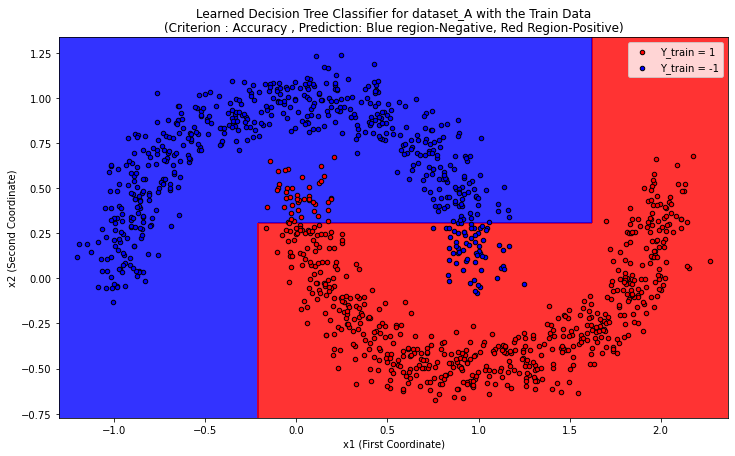

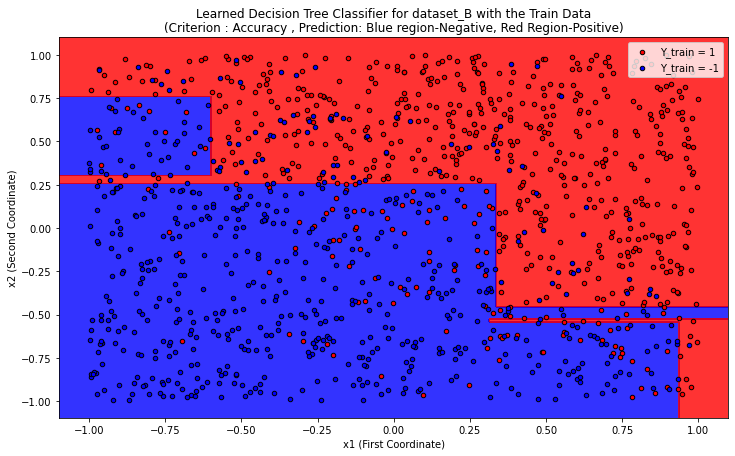

In [15]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 


def visualize_plot(data_set):
    plt.figure(figsize = (12,7))
    plt.title("Learned Decision Tree Classifier for dataset_"+data_set[8]+" with the Train Data\n"+ 
              "(Criterion : Accuracy , Prediction: Blue region-Negative, Red Region-Positive)")
    plt.xlabel("x1 (First Coordinate)")
    plt.ylabel("x2 (Second Coordinate)")
    criterion = 'accuracy'
    #criterion = 'entropy'
    l = get_best_param(data_set,criterion)
    tree = l[5]
    X_train = l[1]
    Y_train = l[2]
    X = X_train
    #print(X.shape)
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X3 = []
    X2 = np.array([X.ravel()])
    Y2 = Y.ravel()
    Z1 = np.vstack((X2,Y2))
    Z1 = Z1.T
    k = eval_decision_tree(tree,Z1)
    Z =  k
    Z = (Z.reshape(500,-1))
    cs = plt.contourf(X,Y, Z, colors=('b', 'r'), alpha = 0.8)
    X1 = []
    X2 = []
    for i in range(X_train.shape[0]):
        if(Y_train[i] == 1):
            X1.append(X_train[i])
        else:
            X2.append(X_train[i])
    X1 = np.array(X1)
    X2 = np.array(X2)
    plt.scatter(X1[:, 0], X1[:, 1],s = 20, label = "Y_train = 1", color = 'r',edgecolors='k')
    plt.scatter(X2[:,0], X2[:, 1], s = 20,label = "Y_train = -1", color = 'b',edgecolors='k')
    plt.legend(loc='upper right')
    plt.show()

for ds in ['dataset_A.npz','dataset_B.npz']:
    visualize_plot(ds)


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [16]:
# CodeWrite cell
# Write Random Forest classifier. 
def h(a):
    if(a == 1 or a==0):
        return 0
    b = 1-a
    return (a*np.log2(1/a)+b*np.log2(1/b))
def entropy(pl,ql,pr,qr):
    return -(pl*h(ql)+pr*h(qr))

def value_of_criterion(criterion,total_left_points,total_right_points,pos_left_points,pos_right_points,left_val):
    if criterion == 'accuracy':
        if left_val == -1:
            return ((total_left_points)-(pos_left_points)+(pos_right_points))/(total_left_points+total_right_points)
        else:
            return ((total_right_points)+(pos_left_points)-(pos_right_points))/(total_left_points+total_right_points)
    else:
        total_points = total_left_points+total_right_points
        if(total_left_points == 0):
            return entropy(total_left_points/total_points,1,total_right_points/total_points,pos_right_points/total_right_points)
        if(total_right_points == 0):
            return entropy(total_left_points/total_points,pos_left_points/total_left_points,total_right_points/total_points,1)
        return entropy(total_left_points/total_points,pos_left_points/total_left_points,
                       total_right_points/total_points,pos_right_points/total_right_points)   

def max_min(X_train,d):
    maxi = -500
    mini = 500
    for i in range(X_train.shape[0]):
        if(maxi<X_train[i][d]):
            maxi = X_train[i][d]
        if(mini>X_train[i][d]):
            mini = X_train[i][d]
    return (maxi,mini)


def args_to_criterion(X_train,Y_train,d,value):
    total_left_points = 0
    total_right_points = 0
    pos_left_points = 0
    pos_right_points = 0
    for i in range(X_train.shape[0]):
        if(X_train[i][d]<value):
            total_left_points+=1
            if(Y_train[i] == 1):
                pos_left_points+=1
        else:
            total_right_points+=1
            if(Y_train[i] == 1):
                pos_right_points+=1
    return (total_left_points,total_right_points,pos_left_points,pos_right_points)


def get_tree_less_attr(X, Y,node_val,node_pos,num_nodes_stop,criterion,d2):
    n = X.shape[0]
    d = X.shape[1]
    a = []
    #print(n)
    if(sum(Y)==n):
        t = [node_pos,0,-1,-1,1]
        a.append(np.array(t))
        return np.array(a)
    elif(sum(Y)==-n):
        t = [node_pos,0,-1,-1,-1]
        a.append(np.array(t))
        return np.array(a)
    elif(n<=num_nodes_stop):
        t = [node_pos,0,-1,-1,node_val]
        a.append(np.array(t))
        return np.array(a)
    else:
        to_comp_val_of_cr = -500
        req_d1 = 0
        req_split_val = 0
        req_left_val = 0
        req_k = 0
        l = int(d*d2)
        co_or_check = np.random.choice(np.arange(d),l)
        #print(co_or_check)
        for d1 in co_or_check:
            maxi,mini = max_min(X,d1)
            diff = maxi-mini
            for k in range(12):
                val = mini+k*diff/10
                a,b,c,d3 = args_to_criterion(X,Y,d1,val)
                #print(d3)
                #print(str(a)+" "+str(b)+" "+str(c)+" "+str(d3)+" "+str(k)+" "+str(d1))
                x1 = value_of_criterion(criterion,a,b,c,d3,-1)
                x2 = value_of_criterion(criterion,a,b,c,d3,1)
                y1 = value_of_criterion('accuracy',a,b,c,d3,-1)
                y2 = value_of_criterion('accuracy',a,b,c,d3,1)
                if(x1<x2):
                    to_comp = x2
                    #print(x2)
                    if(to_comp_val_of_cr<to_comp):
                        to_comp_val_of_cr=to_comp
                        req_left_val = 1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
                elif(x1>x2):
                    to_comp = x1
                    #print(x1)
                    if(to_comp_val_of_cr<to_comp):
                        to_comp_val_of_cr=to_comp
                        req_left_val = -1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
                else:
                    to_comp = x1
                    #print(x1)
                    if(to_comp_val_of_cr<=to_comp):
                        to_comp_val_of_cr=to_comp
                        if(y1>=y2):
                            req_left_val = -1
                        else:
                            req_left_val = 1
                        req_split_val = val
                        req_d1 = d1
                        req_k = k
        #print(str(a)+" "+str(b)+" "+str(c)+" "+str(d3)+" ")
        #print(str(to_comp_val_of_cr)+" +nodepos:"+str(node_pos)+" k="+str(req_k))
        if(req_k == 0 or req_k == 11):
            a = []
            t = [node_pos,0,-1,-1,node_val]
            a.append(np.array(t))
            return np.array(a)
        X1= []
        Y1 = []
        X2=[]
        Y2 = []
        for i in range(n):
            if(X[i][req_d1]<req_split_val):
                X1.append(X[i])
                Y1.append(Y[i])
            else:
                X2.append(X[i])
                Y2.append(Y[i])
        X1 = np.array(X1)
        X2 = np.array(X2)
        Y1 = np.array(Y1)
        Y2 = np.array(Y2)
        a = 2*node_pos
        child1 = get_tree_less_attr(X1, Y1,req_left_val,a,num_nodes_stop, criterion,d2)
        child2 = get_tree_less_attr(X2, Y2,0-req_left_val,a+1,num_nodes_stop, criterion,d2)
        a = []
        t = [node_pos,1,req_d1,req_split_val,node_val]
        a.append(np.array(t))
        a.extend(child1)
        a.extend(child2)
        return np.array(a)    

def train_decision_tree_new(X, Y,b,num_nodes_stop, criterion):
    n = X.shape[0]
    d = X.shape[1]
    a = []
    n1 = 0
    n0 = 0
    for i in range(n):
        if(Y[i] == -1):
            n0+=1
        else:
            n1+=1
    if(n1>n0):
        return get_tree_less_attr(X, Y,1,1,num_nodes_stop, criterion,b)
    else:
        return get_tree_less_attr(X, Y,-1,1,num_nodes_stop, criterion,b)

    
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    R_F = []
    for ac in range(num_trees):
        #print(ac)
        n = X.shape[0]
        d = X.shape[1]
        k = int(n*a)
        train_data = np.random.choice(np.arange(n),k)
        tree = train_decision_tree_new(X[train_data], Y[train_data],b, num_nodes_stop, criterion)
        R_F.append(tree)
    return np.array(R_F)

""" Returns a random forest trained on X and Y. 
Trains num_trees.
Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
Split criterion can be either 'accuracy' or 'entropy'.
Fraction of data used per tree = a
Fraction of features used in each node = b
Returns a random forest (In whatever format that you find appropriate)
"""

def eval_decision_single_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances.
    """
    a = tree
    #print(tree)
    a = a[a[:,0].argsort(kind='mergesort')]
    this_dict = {a[i][0]: a[i] for i in range(a.shape[0])}
    #print(this_dict)
    Y = []
    #print(a)
    for elt in test_X:
        t = 1
        while this_dict[t][1] > 0:
            l = this_dict[t]
            #print(l)
            if(elt[int(l[2])]<l[3]):
                pos = l[0]
                t = int(2*pos)
            else:
                pos = l[0]
                t = int(2*pos+1)
            #print(this_dict[t][1])
        Y.append(this_dict[t][4])
    return np.array(Y)


def eval_decision_tree(random_forest, test_X):
    num_trees = random_forest.shape[0]
    Y = np.zeros(test_X.shape[0])
    for tree in random_forest:
        Y = Y + eval_decision_single_tree(tree, test_X)
    Y = Y/num_trees
    for i in range(Y.shape[0]):
        if(Y[i]>0):
            Y[i] = 1
        else:
            Y[i] = -1
    return Y

    """ Takes in a tree, and a bunch of instances X and 
returns the tree predicted values at those instances."""

In [17]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l


def get_best_param_rf(data_set,criterion):
    l = get_data(data_set)
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    n = X_train.shape[0]
    a = int(0.20*n)
    validation_set = X_train[range(a)]
    validation_Y = Y_train[range(a)]
    train_set = X_train[range(a,n)]
    train_Y = Y_train[range(a,n)]
    x = 640
    num_trees = 10
    best_num_trees = 10
    best_rf = []
    best_accuracy = 0
    while(num_trees<=x):
        j = 0
        #print(num_trees)
        rf = train_random_forest(train_set, train_Y, num_trees, 1, 
                        criterion,0.5,0.5)
        pred = eval_decision_tree(rf,validation_set)
        for i in range(validation_Y.shape[0]):
            if(pred[i] == validation_Y[i]):
                j+=1
        acc = j/validation_Y.shape[0]
        if(acc>=best_accuracy):
            best_num_trees = num_trees
            best_accuracy = acc
            best_rf = rf
        num_trees*=2
    return [best_num_trees,train_set,train_Y,X_test,Y_test,best_rf]


def get_param_train_test_error_rf(data_set,criterion):
    l= get_best_param_rf(data_set,criterion)
    best_param = l[0]
    X_train = l[1]
    Y_train = l[2]
    X_test = l[3]
    Y_test = l[4]
    # Here tree= best rf
    tree = l[5]
    j = 0
    pred = eval_decision_tree(tree,X_train)
    for i in range(X_train.shape[0]):
        if(pred[i] != Y_train[i]):
            j+=1
    acc1 = j/Y_train.shape[0]
    j = 0
    pred = eval_decision_tree(tree,X_test)
    for i in range(X_test.shape[0]):
        if(pred[i] != Y_test[i]):
            j+=1
    acc2 = j/Y_test.shape[0]
    return [best_param,acc1,acc2]

#for criterion in ['accuracy','entropy']:
#    print(criterion)
#    for data_set in ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']:
#        l = get_param_train_test_error_rf(data_set,criterion)
#        print(str(l[0])+"  "+str(l[1])+"  "+str(l[2]))


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

| CRITERION = ACCURACY      |  best num_trees  |     train 0-1 error |       test 0-1 error |
|---------------------------|-----------------:|--------------------:|---------------------:|
|                 dataset_A |               40 | 0.09083333333333334 |                0.106 |
|                 dataset_B |              320 | 0.16333333333333333 |                  0.2 |
|                 dataset_C |              160 | 0.04583333333333333 |  0.07407407407407407 |
|                 dataset_D |               10 |            0.034375 | 0.047337278106508875 |

| CRITERION = ENTROPY      |  best num_trees  |       train 0-1 error |       test 0-1 error |
|--------------------------|-----------------:|----------------------:|---------------------:|
|                dataset_A |              640 |                   0.0 |                 0.01 |
|                dataset_B |              640 |   0.04083333333333333 |                0.206 |
|                dataset_C |              160 | 0.0033333333333333335 |  0.04040404040404041 |
|                dataset_D |              160 |               0.00625 | 0.029585798816568046 |


Observations:
1. Previously, we have seen that for a single decision tree, the entropy criterion provides a relatively less error. As random forest is simply bagging of trees, almost the same trend is also seen here.
2. The errors(espescially test errors) in random forests are slightly lower than what is observed in decision trees as random forests are parallel ensembles of decision trees, and hence they are expected to be good classifiers(less errors).
3. But there is not much difference between the errors as the decision trees themselves are good learners.
4. The above values change with different runs of the code beacuse we provide different sets as inputs and also only some of the attributes are checked for building a node as we randomly choose them out of given samples. Reported best_num_trees are majorly occuring values on different runs.
5. Comparing the plots of trees and forests we see that trees have good boundaries(straight lines) where as forests have irregularities because they are average of different trees.
6. Here the time taken in generating above values and below plots is far more larger compared to trees as we are checking for upto 640 trees and hence time complexity is almost 100 times larger than a single tree code.Also, dataset C takes many minutes(almost half n hour) to generate the values as it has 1500 training points,each of 64 dimensions.

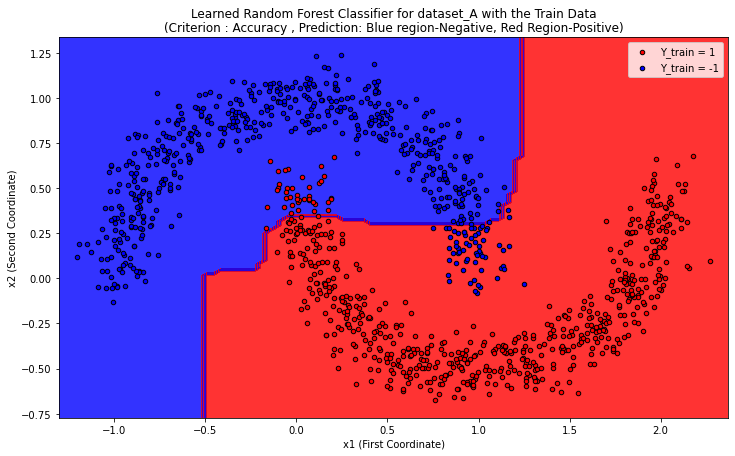

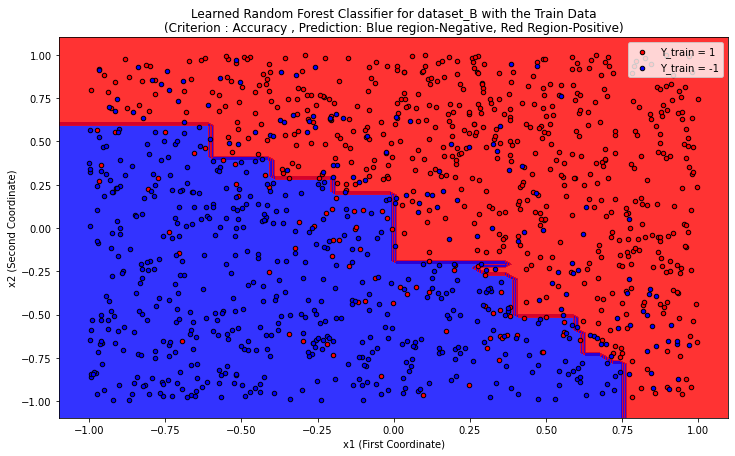

In [18]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2
def visualize_plot(data_set):
    plt.figure(figsize = (12,7))
    plt.title("Learned Random Forest Classifier for dataset_"+data_set[8]+" with the Train Data\n"+ 
              "(Criterion : Accuracy , Prediction: Blue region-Negative, Red Region-Positive)")
    plt.xlabel("x1 (First Coordinate)")
    plt.ylabel("x2 (Second Coordinate)")
    criterion = 'accuracy'
    #criterion = 'entropy'
    l = get_best_param_rf(data_set,criterion)
    tree = l[5]
    X_train = l[1]
    Y_train = l[2]
    X = X_train
    #print(X.shape)
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    X,Y = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
    X3 = []
    X2 = np.array([X.ravel()])
    Y2 = Y.ravel()
    Z1 = np.vstack((X2,Y2))
    Z1 = Z1.T
    k = eval_decision_tree(tree,Z1)
    Z =  k
    Z = (Z.reshape(100,-1))
    cs = plt.contourf(X,Y, Z,colors=('b', 'r'), alpha = 0.8)
    X1 = []
    X2 = []
    for i in range(X_train.shape[0]):
        if(Y_train[i] == 1):
            X1.append(X_train[i])
        else:
            X2.append(X_train[i])
    X1 = np.array(X1)
    X2 = np.array(X2)
    plt.scatter(X1[:, 0], X1[:, 1],s = 20, label = "Y_train = 1", color = 'r',edgecolors='k')
    plt.scatter(X2[:,0], X2[:, 1], s = 20,label = "Y_train = -1", color = 'b',edgecolors='k')
    plt.legend(loc='upper right')
    plt.show()

for ds in ['dataset_A.npz','dataset_B.npz']:
    visualize_plot(ds)
    
